In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy import units as u
from astropy import constants as const
absor1 = pd.read_csv('/Users/huihaoz/Downloads/GeometricA_Earth_HighCloud_UltraRes1.dat', comment = '#', delimiter='\s+')
absor2 = pd.read_csv('/Users/huihaoz/Downloads/mktrans_zmnq_16_15.dat', comment = '#', delimiter='\s+')
pts=pd.read_csv('/Users/huihaoz/Downloads/PT_PES.txt', sep=',')
pts["Teq"] = (pts.STK * ((pts.SRadiusSun *  const.R_sun/(2*pts.SMAAU * const.au)))**(1/2) * (1-0.3)**(0.25))
pts.iloc[0,8]=181.7
pts.iloc[4,8]=468
pts.iloc[9,8]=230.9
sep_arr = ((np.array(pts["SMAAU"]) * u.AU / (np.array(pts["DistancePC"] )* u.pc)).to(u.m/u.m)* u.radian).to(u.arcsec)
sep_lim_um  = (((sep_arr).to(u.radian) / u.radian) * 39.3*u.meter).to(u.micron)
# Split a Python List into Chunks using For Loops
our_list = np.array(absor1.albH2O[:1079300])
chunked_list = list()
chunk_size = 251*2*5
for i in range(0, len(our_list), chunk_size):
    chunked_list.append(our_list[i:i+chunk_size])
    
our_listwl = np.array(absor1.nm[:1079300] / 1000)
chunked_listwl = list()
chunk_sizewl = 251*2*5
for i in range(0, len(our_listwl), chunk_sizewl):
    chunked_listwl.append(our_listwl[i:i+chunk_sizewl])
    
y_fit_index = np.linspace(0,429,430,dtype = int)
wl_fit_index = [np.argmax(chunked_list[i]) for i in y_fit_index] #just for check

pn_fit_non = [max(chunked_list[i]) for i in y_fit_index]
wl_fit_non = [chunked_listwl[i][np.argmax(chunked_list[i])] for i in y_fit_index]
alb_nogas = np.interp(absor1.nm/1000,wl_fit_non,np.array(pn_fit_non))
wl_um2 = np.array(absor1.nm[:1079300])/1000 * u.um
my_list_norabd = (absor1.totalb / alb_nogas)

# Iterate over the list and replace any value greater than 1 with 1
for i in range(len(my_list_norabd)):
    if my_list_norabd[i] > 1:
        my_list_norabd[i] = 1
tbd_planet=[]

for i in range(len(pts.Teq)):
    tbd_planet.append(np.array(my_list_norabd[:1079300]) * 2 * const.h *const.c**2 / ((wl_um2)**5 * (np.e**(const.c * const.h / (wl_um2 *const.k_B * pts.Teq[i] * u.K)) - 1)))
dis_2 = pts.DistancePC* const.pc
d_s_2 = pts.RadiusEar * const.R_earth
ste = (d_s_2**2 * np.pi / dis_2**2)
tbd_planet_earth = []
for i in range(len(tbd_planet)):

    tbd_planet_earth.append((tbd_planet[i] * ste[i]).to(u.erg/(u.s * u.cm**2 * u.um)))
Flux_tbd_planet_earth =[]
for i in range(len(tbd_planet_earth)):
    Flux_tbd_planet_earth.append((tbd_planet_earth[i][1:] * np.diff(wl_um2)).to(u.W/u.m**2))


f_tra0 = pd.read_csv('/Users/huihaoz/Downloads/lte030.0-5.0-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra1 = pd.read_csv('/Users/huihaoz/Downloads/lte030.0-5.0-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra7 = pd.read_csv('/Users/huihaoz/Downloads/lte034.0-4.5-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra8 = pd.read_csv('/Users/huihaoz/Downloads/lte030.0-5.0-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra9 = pd.read_csv('/Users/huihaoz/Downloads/lte037.0-5.0-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra10 = pd.read_csv('/Users/huihaoz/Downloads/lte029.0-5.0-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra13 = pd.read_csv('/Users/huihaoz/Downloads/lte033.0-5.0-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra14 = pd.read_csv('/Users/huihaoz/Downloads/lte026.0-5.0-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra15 = pd.read_csv('/Users/huihaoz/Downloads/lte026.0-5.0-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra16 = pd.read_csv('/Users/huihaoz/Downloads/lte030.0-5.0-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra17 = pd.read_csv('/Users/huihaoz/Downloads/lte033.0-5.0-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra18 = pd.read_csv('/Users/huihaoz/Downloads/lte030.0-5.0-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_traErgsseccmA=np.array([np.array(f_tra0.ErgsseccmA),np.array(f_tra1.ErgsseccmA),np.array(f_tra7.ErgsseccmA),np.array(f_tra8.ErgsseccmA),np.array(f_tra9.ErgsseccmA),np.array(f_tra10.ErgsseccmA),np.array(f_tra13.ErgsseccmA),np.array(f_tra14.ErgsseccmA),np.array(f_tra15.ErgsseccmA),np.array(f_tra16.ErgsseccmA),np.array(f_tra17.ErgsseccmA),np.array(f_tra18.ErgsseccmA)])
f_tra1_fum0=[10**(i-8) * u.erg/(u.s * u.cm**2 *u.Angstrom) for i in f_traErgsseccmA]
f_traAng=np.array([np.array(f_tra0.Angstroem / 10000),np.array(f_tra1.Angstroem / 10000),np.array(f_tra7.Angstroem / 10000),np.array(f_tra8.Angstroem / 10000),np.array(f_tra9.Angstroem / 10000),np.array(f_tra10.Angstroem / 10000),np.array(f_tra13.Angstroem / 10000),np.array(f_tra14.Angstroem / 10000),np.array(f_tra15.Angstroem / 10000), np.array(f_tra16.Angstroem / 10000),np.array(f_tra17.Angstroem / 10000),np.array(f_tra18.Angstroem / 10000)])


/var/folders/6t/cpjtlkn10wv603vnph9nr3sh0000gn/T/ipykernel_889/499863125.py:69: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  f_traErgsseccmA=np.array([np.array(f_tra0.ErgsseccmA),np.array(f_tra1.ErgsseccmA),np.array(f_tra7.ErgsseccmA),np.array(f_tra8.ErgsseccmA),np.array(f_tra9.ErgsseccmA),np.array(f_tra10.ErgsseccmA),np.array(f_tra13.ErgsseccmA),np.array(f_tra14.ErgsseccmA),np.array(f_tra15.ErgsseccmA),np.array(f_tra16.ErgsseccmA),np.array(f_tra17.ErgsseccmA),np.array(f_tra18.ErgsseccmA)])
/var/folders/6t/cpjtlkn10wv603vnph9nr3sh0000gn/T/ipykernel_889/499863125.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do 

In [2]:
absor1

,nm,totalb,albH2O,albco2,albn2o,albch4,albo2,albo3
0,500.000000,0.529546,0.551133,0.551133,0.551133,0.551133,0.551133,0.529546
1,500.001151,0.529549,0.551138,0.551138,0.551138,0.551138,0.551138,0.529549
2,500.002303,0.529552,0.551143,0.551143,0.551143,0.551143,0.551143,0.529552
3,500.003454,0.529555,0.551149,0.551149,0.551149,0.551149,0.551149,0.529555
4,500.004605,0.529559,0.551154,0.551154,0.551154,0.551154,0.551154,0.529559
...,...,...,...,...,...,...,...,...
1699995,24999.770081,237.124200,237.124200,120.289100,120.289100,120.289100,120.289100,120.289100
1699996,24999.827561,236.584200,236.584200,120.290300,120.290300,120.290300,120.290300,120.290300
1699997,24999.885040,236.046700,236.046600,120.291500,120.291500,120.291500,120.291500,120.291500
1699998,24999.942520,235.417900,235.417900,120.292700,120.292700,120.292700,120.292700,120.292700


In [3]:
pts["limit_wl"] = sep_lim_um.value

In [4]:
pts

,Planet,MassEar,RadiusEar,SMAAU,DistancePC,SRadiusSun,Slogg,STK,Teq,limit_wl
0,GJ 1002 c,1.360,1.089911,0.07380,4.84867,0.1400,5.10,3024.0,181.700000,2.900021
1,GJ 1061 d,1.640,1.148567,0.05400,3.67278,0.1600,5.16,2953.0,224.199359,2.801343
2,GJ 667 C c,3.800,1.819741,0.12500,7.24396,0.3300,4.69,3350.0,240.079224,3.287770
3,GJ 682 b,4.400,1.984149,0.08000,5.00671,0.3000,4.93,3028.0,258.630246,3.044423
4,GJ 887 b,4.200,1.930431,0.06800,3.29000,0.4700,4.78,3688.0,468.000000,3.938043
5,Proxima Cen b,1.070,1.019125,0.04856,1.30119,0.1400,5.16,2900.0,217.185329,7.110586
6,Wolf 1061 c,3.410,1.707113,0.08900,4.30592,0.3100,4.90,3342.0,275.106022,3.938143
7,TRAPPIST-1 e,0.692,0.920000,0.02925,12.10000,0.1192,5.24,2566.0,228.475508,0.460583
8,TRAPPIST-1 h,0.326,0.755000,0.06189,12.10000,0.1192,5.24,2566.0,157.069675,0.974546
9,GJ 1002 b,1.080,1.021946,0.04570,4.84867,0.1400,5.10,3024.0,230.900000,1.795812


In [5]:
sep_lim_um 

<Quantity [2.90002106, 2.80134284, 3.28776968, 3.04442281, 3.9380428 ,
           7.11058575, 3.93814286, 0.46058301, 0.97454642, 1.7958125 ,
           1.65932986, 1.81568517] micron>

In [6]:
pts

,Planet,MassEar,RadiusEar,SMAAU,DistancePC,SRadiusSun,Slogg,STK,Teq,limit_wl
0,GJ 1002 c,1.360,1.089911,0.07380,4.84867,0.1400,5.10,3024.0,181.700000,2.900021
1,GJ 1061 d,1.640,1.148567,0.05400,3.67278,0.1600,5.16,2953.0,224.199359,2.801343
2,GJ 667 C c,3.800,1.819741,0.12500,7.24396,0.3300,4.69,3350.0,240.079224,3.287770
3,GJ 682 b,4.400,1.984149,0.08000,5.00671,0.3000,4.93,3028.0,258.630246,3.044423
4,GJ 887 b,4.200,1.930431,0.06800,3.29000,0.4700,4.78,3688.0,468.000000,3.938043
5,Proxima Cen b,1.070,1.019125,0.04856,1.30119,0.1400,5.16,2900.0,217.185329,7.110586
6,Wolf 1061 c,3.410,1.707113,0.08900,4.30592,0.3100,4.90,3342.0,275.106022,3.938143
7,TRAPPIST-1 e,0.692,0.920000,0.02925,12.10000,0.1192,5.24,2566.0,228.475508,0.460583
8,TRAPPIST-1 h,0.326,0.755000,0.06189,12.10000,0.1192,5.24,2566.0,157.069675,0.974546
9,GJ 1002 b,1.080,1.021946,0.04570,4.84867,0.1400,5.10,3024.0,230.900000,1.795812


In [7]:
absor1

,nm,totalb,albH2O,albco2,albn2o,albch4,albo2,albo3
0,500.000000,0.529546,0.551133,0.551133,0.551133,0.551133,0.551133,0.529546
1,500.001151,0.529549,0.551138,0.551138,0.551138,0.551138,0.551138,0.529549
2,500.002303,0.529552,0.551143,0.551143,0.551143,0.551143,0.551143,0.529552
3,500.003454,0.529555,0.551149,0.551149,0.551149,0.551149,0.551149,0.529555
4,500.004605,0.529559,0.551154,0.551154,0.551154,0.551154,0.551154,0.529559
...,...,...,...,...,...,...,...,...
1699995,24999.770081,237.124200,237.124200,120.289100,120.289100,120.289100,120.289100,120.289100
1699996,24999.827561,236.584200,236.584200,120.290300,120.290300,120.290300,120.290300,120.290300
1699997,24999.885040,236.046700,236.046600,120.291500,120.291500,120.291500,120.291500,120.291500
1699998,24999.942520,235.417900,235.417900,120.292700,120.292700,120.292700,120.292700,120.292700


(0.0, 1.5)

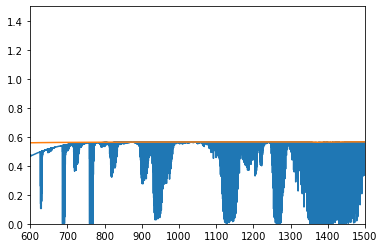

In [8]:
plt.plot(absor1.nm,absor1.totalb)
plt.plot(absor1.nm,alb_nogas)
plt.xlim(600,1500)
plt.ylim(0,1.5)

In [9]:
f_ref_earth_fit =[]
for i in range(len(f_tra1_fum0)):
    f_ref_earth_fit.append(np.interp(absor1.nm[:1079300]/1000,f_traAng[i],f_tra1_fum0[i]))

In [10]:
Flux_surface = []
for i in range(len(f_ref_earth_fit)):
    Flux_surface.append((f_ref_earth_fit[i][1:] * np.diff(absor1.nm[:1079300]/1000) * u.um).to(u.W/u.m**2))

In [11]:
df = (pts.SRadiusSun * const.R_sun / (pts.SMAAU * const.au))**2

f_ref_p = np.array(Flux_surface)* np.array(df).reshape(-1,1)
f_ref_earth = f_ref_p* np.pi * np.array(((pts.RadiusEar * const.R_earth)**2 / (4 * np.pi * (pts.DistancePC * const.pc)**2))).reshape(-1,1)
f_ref_earth_fit = f_ref_earth 

modern_earth_abd_fit = np.array(my_list_norabd[1:1079300])*0.3
f_ref_planet_earth_fit = [i * modern_earth_abd_fit for i in f_ref_earth_fit] #w/m2
flux_tot = np.array(f_ref_planet_earth_fit)+np.array(Flux_tbd_planet_earth)
wl_um_check = np.linspace(0.5,2.45,1950) * u.um

Range_min=wl_um_check-np.diff(wl_um_check)[1]*0.5
Range_max=wl_um_check+np.diff(wl_um_check)[1]*0.5
bin_range=[]
for i in range(len(wl_um_check)):
    bin_range.append(np.where((absor1.nm[1:1079300]/1000 < Range_max[i]/u.um) & (absor1.nm[1:1079300]/1000 > Range_min[i]/u.um)))
flux_bin = [[],[],[],[],[],[],[],[],[],[],[],[]]#W/m**2
for a in range(len(flux_tot)):
    for i in range(len(bin_range)):
        flux_bin[a].append(np.sum(flux_tot[a][bin_range[i]]))
        

# NO GAS
my_list_Noabd = alb_nogas*0+1
tbd_planet_no=[]

for i in range(len(pts.Teq)):
    tbd_planet_no.append(np.array(my_list_Noabd[:1079300]) * 2 * const.h *const.c**2 / ((wl_um2)**5 * (np.e**(const.c * const.h / (wl_um2 *const.k_B * pts.Teq[i] * u.K)) - 1)))
tbd_planet_earth_no = []
for i in range(len(tbd_planet_no)):
    tbd_planet_earth_no.append((tbd_planet_no[i] * ste[i]).to(u.erg/(u.s * u.cm**2 * u.um)))
Flux_tbd_planet_earth_no =[]
for i in range(len(tbd_planet_earth_no)):
    Flux_tbd_planet_earth_no.append((tbd_planet_earth_no[i][1:] * np.diff(wl_um2)).to(u.W/u.m**2))
##
modern_earth_abd_fit_no = np.array(my_list_norabd[1:1079300])*0 + 0.3
f_ref_planet_earth_fit_no = [i * modern_earth_abd_fit_no for i in f_ref_earth_fit]
flux_tot_no = np.array(f_ref_planet_earth_fit_no)+np.array(Flux_tbd_planet_earth_no)

flux_bin_no = [[],[],[],[],[],[],[],[],[],[],[],[]]#W/m**2
for a in range(len(flux_tot_no)):
    for i in range(len(bin_range)):
        flux_bin_no[a].append(np.sum(flux_tot_no[a][bin_range[i]]))

---

# Star

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy import units as u
from astropy import constants as const
from astropy.nddata import NDData

In [13]:
h = const.h
wl_um = np.linspace(0.5,2.45,1950) * u.um
c = const.c #unit:m/s
wl_m = (wl_um).to(u.m)
pe_1 = h * c / (wl_um).to(u.um)
wl_um_check = np.linspace(0.5,2.45,1950)*u.um

In [14]:
df_s = (pts.SRadiusSun * const.R_sun / (pts.DistancePC * const.pc))**2
f_s = np.array(Flux_surface)*np.array(df_s).reshape(-1,1)
f_s_fit = f_s 
flux_bin_s = [[],[],[],[],[],[],[],[],[],[],[],[]]#W/m**2
for a in range(len(f_s_fit)):
    for i in range(len(bin_range)):
        flux_bin_s[a].append(np.sum(f_s_fit[a][bin_range[i]]))

In [15]:
pts=pd.read_csv('/Users/huihaoz/Downloads/PT_PES.txt', sep=',')
R = 3500 # here we set Reseolution = 1000
t = 10*60*60*u.s # here we set time = 1h with unit:s
S = (3930 * 0.5)**2 * np.pi *u.cm * u.cm #here we set diameter as the first diameter with unit:cm
tele_tp = 0.1

In [16]:
pe_1

<Quantity [3.97289171e-25, 3.96495773e-25, 3.95705537e-25, ...,
           8.11456981e-26, 8.11125469e-26, 8.10794227e-26] J m / um>

In [17]:
wl_um_check

<Quantity [0.5       , 0.50100051, 0.50200103, ..., 2.44799897, 2.44899949,
           2.45      ] um>

In [18]:
pn_0_elt=(np.array(flux_bin_s[0])*u.W/u.m**2 *tele_tp*S*t/(pe_1)).to(u.m/u.m)
pn_1_elt=(np.array(flux_bin_s[1])*u.W/u.m**2 *tele_tp*S*t/(pe_1)).to(u.m/u.m)
pn_2_elt=(np.array(flux_bin_s[2])*u.W/u.m**2 *tele_tp*S*t/(pe_1)).to(u.m/u.m)
pn_3_elt=(np.array(flux_bin_s[3])*u.W/u.m**2 *tele_tp*S*t/(pe_1)).to(u.m/u.m)
pn_4_elt=(np.array(flux_bin_s[4])*u.W/u.m**2 *tele_tp*S*t/(pe_1)).to(u.m/u.m)
pn_5_elt=(np.array(flux_bin_s[5])*u.W/u.m**2 *tele_tp*S*t/(pe_1)).to(u.m/u.m)
pn_6_elt=(np.array(flux_bin_s[6])*u.W/u.m**2 *tele_tp*S*t/(pe_1)).to(u.m/u.m)
pn_7_elt=(np.array(flux_bin_s[7])*u.W/u.m**2 *tele_tp*S*t/(pe_1)).to(u.m/u.m)
pn_8_elt=(np.array(flux_bin_s[8])*u.W/u.m**2 *tele_tp*S*t/(pe_1)).to(u.m/u.m)
pn_9_elt=(np.array(flux_bin_s[9])*u.W/u.m**2 *tele_tp*S*t/(pe_1)).to(u.m/u.m)
pn_10_elt=(np.array(flux_bin_s[10])*u.W/u.m**2 *tele_tp*S*t/(pe_1)).to(u.m/u.m)
pn_11_elt=(np.array(flux_bin_s[11])*u.W/u.m**2 *tele_tp*S*t/(pe_1)).to(u.m/u.m)

In [19]:
phe_1e=[i * u.W/u.m**2 for i in flux_bin] #new method, f_palnet

In [20]:
pn_0e_elt=(np.array(phe_1e[0])*u.W/u.m**2 *tele_tp*S*t/(pe_1)).to(u.m/u.m)
pn_1e_elt=(np.array(phe_1e[1])*u.W/u.m**2 *tele_tp*S*t/(pe_1)).to(u.m/u.m)
pn_2e_elt=(np.array(phe_1e[2])*u.W/u.m**2 *tele_tp*S*t/(pe_1)).to(u.m/u.m)
pn_3e_elt=(np.array(phe_1e[3])*u.W/u.m**2 *tele_tp*S*t/(pe_1)).to(u.m/u.m)
pn_4e_elt=(np.array(phe_1e[4])*u.W/u.m**2 *tele_tp*S*t/(pe_1)).to(u.m/u.m)
pn_5e_elt=(np.array(phe_1e[5])*u.W/u.m**2 *tele_tp*S*t/(pe_1)).to(u.m/u.m)
pn_6e_elt=(np.array(phe_1e[6])*u.W/u.m**2 *tele_tp*S*t/(pe_1)).to(u.m/u.m)
pn_7e_elt=(np.array(phe_1e[7])*u.W/u.m**2 *tele_tp*S*t/(pe_1)).to(u.m/u.m)
pn_8e_elt=(np.array(phe_1e[8])*u.W/u.m**2 *tele_tp*S*t/(pe_1)).to(u.m/u.m)
pn_9e_elt=(np.array(phe_1e[9])*u.W/u.m**2 *tele_tp*S*t/(pe_1)).to(u.m/u.m)
pn_10e_elt=(np.array(phe_1e[10])*u.W/u.m**2 *tele_tp*S*t/(pe_1)).to(u.m/u.m)
pn_11e_elt=(np.array(phe_1e[11])*u.W/u.m**2 *tele_tp*S*t/(pe_1)).to(u.m/u.m)

# Noise

In [21]:
pe_1 = h * c / (wl_um).to(u.um) #energy of photon
ste_atmo2 = ((2*u.um / (39.3*u.m))**2 * u.steradian).to(u.arcsec**2) #ste
n_s = pd.read_csv('/Users/huihaoz/Documents/reseatch/radiance.dat.txt', comment = '#', delimiter='\s+')
wl_ns = (np.array(n_s["wavelength(nm)"])*u.nm).to(u.um)
bri_surface = np.array(n_s["ph/sec/arcsec^2/um/m^2"])*u.ph/(u.m**2 * u.s * u.arcsec**2 *u.um)
pe_ns = (h * c /wl_ns).to(u.J)/u.ph
st = ste_atmo2
f_n_s = ((bri_surface *pe_ns).to(u.W/(u.m**2 * u.um * u.steradian))*st*np.diff(wl_ns)[1]).to(u.W/u.m**2)
bin_range_n = []

for i in range(len(wl_um)):
    bin_range_n.append(np.where((wl_ns/u.um < Range_max[i]/u.um) & (wl_ns/u.um > Range_min[i]/u.um)))
f_r_n=[]
for i in range(len(bin_range_n)):
    f_r_n.append(np.sum(f_n_s[bin_range_n[i]]).value)
pe_e = (h * c / wl_um).to(u.J)
noif_sky =(np.array(f_r_n)*u.W/u.m**2)
pnsky_1_elt=(tele_tp*noif_sky*S*t*wl_um/(pe_1*u.um)).to(u.m/u.m)

In [22]:
trans = pd.read_csv('/Users/huihaoz/Documents/reseatch/transmission.dat.txt', comment = '#', delimiter='\s+')
trans_use = np.interp(wl_um/u.um,trans["wavelength(nm)"]/1000,trans["transmission"])
pn_pla_elt=[pn_0e_elt,pn_1e_elt,pn_2e_elt,pn_3e_elt,pn_4e_elt,pn_5e_elt,pn_6e_elt,pn_7e_elt,pn_8e_elt,pn_9e_elt,pn_10e_elt,pn_11e_elt]
pn_star_elt=[pn_0_elt,pn_1_elt,pn_2_elt,pn_3_elt,pn_4_elt,pn_5_elt,pn_6_elt,pn_7_elt,pn_8_elt,pn_9_elt,pn_10_elt,pn_11_elt]
nor_trans = np.random.normal(trans_use,0.001*trans_use)

In [23]:

c_1 = 10**(-3)
n_0 = ((((pn_0e_elt+2*c_1*pn_0_elt)*trans_use+2*pnsky_1_elt)**(1/2) / nor_trans)**2 + (0.001)**2 * pn_0e_elt**2)**(1/2)
n_1 = ((((pn_1e_elt+2*c_1*pn_1_elt)*trans_use+2*pnsky_1_elt)**(1/2) / nor_trans)**2 + (0.001)**2 * pn_1e_elt**2)**(1/2)
n_2 = ((((pn_2e_elt+2*c_1*pn_2_elt)*trans_use+2*pnsky_1_elt)**(1/2) / nor_trans)**2 + (0.001)**2 * pn_2e_elt**2)**(1/2)
n_3 = ((((pn_3e_elt+2*c_1*pn_3_elt)*trans_use+2*pnsky_1_elt)**(1/2) / nor_trans)**2 + (0.001)**2 * pn_3e_elt**2)**(1/2)
n_4 = ((((pn_4e_elt+2*c_1*pn_4_elt)*trans_use+2*pnsky_1_elt)**(1/2) / nor_trans)**2 + (0.001)**2 * pn_4e_elt**2)**(1/2)
n_5 = ((((pn_5e_elt+2*c_1*pn_5_elt)*trans_use+2*pnsky_1_elt)**(1/2) / nor_trans)**2 + (0.001)**2 * pn_5e_elt**2)**(1/2)
n_6 = ((((pn_6e_elt+2*c_1*pn_6_elt)*trans_use+2*pnsky_1_elt)**(1/2) / nor_trans)**2 + (0.001)**2 * pn_6e_elt**2)**(1/2)
n_7 = ((((pn_7e_elt+2*c_1*pn_7_elt)*trans_use+2*pnsky_1_elt)**(1/2) / nor_trans)**2 + (0.001)**2 * pn_7e_elt**2)**(1/2)
n_8 = ((((pn_8e_elt+2*c_1*pn_8_elt)*trans_use+2*pnsky_1_elt)**(1/2) / nor_trans)**2 + (0.001)**2 * pn_8e_elt**2)**(1/2)
n_9 = ((((pn_9e_elt+2*c_1*pn_9_elt)*trans_use+2*pnsky_1_elt)**(1/2) / nor_trans)**2 + (0.001)**2 * pn_9e_elt**2)**(1/2)
n_10 = ((((pn_10e_elt+2*c_1*pn_10_elt)*trans_use+2*pnsky_1_elt)**(1/2) / nor_trans)**2 + (0.001)**2 * pn_10e_elt**2)**(1/2)
n_11 = ((((pn_11e_elt+2*c_1*pn_11_elt)*trans_use+2*pnsky_1_elt)**(1/2) / nor_trans)**2 + (0.001)**2 * pn_11e_elt**2)**(1/2)

# No gas

In [24]:
phe_1e_nogas=[i * u.W/u.m**2 for i in flux_bin_no] #changed

In [25]:
pn_0e_elt_nogas=(np.array(phe_1e_nogas[0])*u.W/u.m**2 *tele_tp*S*t/(pe_1)).to(u.m/u.m)
pn_1e_elt_nogas=(np.array(phe_1e_nogas[1])*u.W/u.m**2 *tele_tp*S*t/(pe_1)).to(u.m/u.m)
pn_2e_elt_nogas=(np.array(phe_1e_nogas[2])*u.W/u.m**2 *tele_tp*S*t/(pe_1)).to(u.m/u.m)
pn_3e_elt_nogas=(np.array(phe_1e_nogas[3])*u.W/u.m**2 *tele_tp*S*t/(pe_1)).to(u.m/u.m)
pn_4e_elt_nogas=(np.array(phe_1e_nogas[4])*u.W/u.m**2 *tele_tp*S*t/(pe_1)).to(u.m/u.m)
pn_5e_elt_nogas=(np.array(phe_1e_nogas[5])*u.W/u.m**2 *tele_tp*S*t/(pe_1)).to(u.m/u.m)
pn_6e_elt_nogas=(np.array(phe_1e_nogas[6])*u.W/u.m**2 *tele_tp*S*t/(pe_1)).to(u.m/u.m)
pn_7e_elt_nogas=(np.array(phe_1e_nogas[7])*u.W/u.m**2 *tele_tp*S*t/(pe_1)).to(u.m/u.m)
pn_8e_elt_nogas=(np.array(phe_1e_nogas[8])*u.W/u.m**2 *tele_tp*S*t/(pe_1)).to(u.m/u.m)
pn_9e_elt_nogas=(np.array(phe_1e_nogas[9])*u.W/u.m**2 *tele_tp*S*t/(pe_1)).to(u.m/u.m)
pn_10e_elt_nogas=(np.array(phe_1e_nogas[10])*u.W/u.m**2 *tele_tp*S*t/(pe_1)).to(u.m/u.m)
pn_11e_elt_nogas=(np.array(phe_1e_nogas[11])*u.W/u.m**2 *tele_tp*S*t/(pe_1)).to(u.m/u.m)

In [26]:
dn = np.array([pn_0e_elt_nogas-pn_0e_elt,pn_1e_elt_nogas-pn_1e_elt,pn_2e_elt_nogas-pn_2e_elt,pn_3e_elt_nogas-pn_3e_elt,pn_4e_elt_nogas-pn_4e_elt,pn_5e_elt_nogas-pn_5e_elt,pn_6e_elt_nogas-pn_6e_elt,pn_7e_elt_nogas-pn_7e_elt,pn_8e_elt_nogas-pn_8e_elt,pn_9e_elt_nogas-pn_9e_elt,pn_10e_elt_nogas-pn_10e_elt,pn_11e_elt_nogas-pn_11e_elt])
dnr = np.array([n_0,n_1,n_2,n_3,n_4,n_5,n_6,n_7,n_8,n_9,n_10,n_11])

# OK, all data debuged(above)
---

In [27]:
h2o_f=(0.3-0.3*(absor1.albH2O[:1079300]/alb_nogas[:1079300]))
co2_f=(0.3-0.3*(absor1.albco2[:1079300]/alb_nogas[:1079300]))
ch4_f=(0.3-0.3*(absor1.albch4[:1079300]/alb_nogas[:1079300]))
o2_f=(0.3-0.3*(absor1.albo2[:1079300]/alb_nogas[:1079300]))

O2

In [28]:
# Split a Python List into Chunks using For Loops
our_list = np.array(o2_f)
chunked_list = list()
chunk_size = 251*5*2
for i in range(0, len(our_list), chunk_size):
    chunked_list.append(our_list[i:i+chunk_size])
    
our_listwl = np.array(absor1.nm[:1079300] / 1000)
chunked_listwl = list()
chunk_sizewl = 251*5*2
for i in range(0, len(our_listwl), chunk_sizewl):
    chunked_listwl.append(our_listwl[i:i+chunk_sizewl])
    
y_fit_index = np.linspace(0,429,430,dtype = int)
wl_fit_index = [np.argmax(chunked_list[i]) for i in y_fit_index] #just for check

pn_fit_non = [max(chunked_list[i]) for i in y_fit_index]
wl_fit_non = [chunked_listwl[i][np.argmax(chunked_list[i])] for i in y_fit_index]
interp_o2 = np.interp(wl_um/u.um,wl_fit_non,np.array(pn_fit_non))
baseline_feat = absor1.albo2[300000]*0.5*0.5
ind_o2 = np.where((interp_o2>0.15))

In [29]:
# Split a Python List into Chunks using For Loops
our_list = np.array(h2o_f)
chunked_list = list()
chunk_size = 251*5*2
for i in range(0, len(our_list), chunk_size):
    chunked_list.append(our_list[i:i+chunk_size])
    
our_listwl = np.array(absor1.nm[:1079300] / 1000)
chunked_listwl = list()
chunk_sizewl = 251*5*2
for i in range(0, len(our_listwl), chunk_sizewl):
    chunked_listwl.append(our_listwl[i:i+chunk_sizewl])
    
y_fit_index = np.linspace(0,429,430,dtype = int)
wl_fit_index = [np.argmax(chunked_list[i]) for i in y_fit_index] #just for check

pn_fit_non = [max(chunked_list[i]) for i in y_fit_index]
wl_fit_non = [chunked_listwl[i][np.argmax(chunked_list[i])] for i in y_fit_index]
interp_h2o = np.interp(wl_um/u.um,wl_fit_non,np.array(pn_fit_non))
ind_h2o = np.where((interp_h2o>0.15))

In [30]:
len(interp_h2o)

1950

In [31]:
wl_um

<Quantity [0.5       , 0.50100051, 0.50200103, ..., 2.44799897, 2.44899949,
           2.45      ] um>

In [32]:
wl_um[ind_h2o]

<Quantity [0.90020523, 0.90120575, 0.90220626, 0.90320677, 0.93022063,
           0.93122114, 0.93222165, 0.93322217, 0.93422268, 0.93522319,
           0.9362237 , 0.93722422, 0.93822473, 0.93922524, 0.94022576,
           0.94122627, 0.94222678, 0.9432273 , 0.94422781, 0.94522832,
           0.94622884, 0.94722935, 0.94822986, 0.94923037, 0.95023089,
           0.9512314 , 0.95223191, 0.95323243, 0.95423294, 0.95523345,
           0.95623397, 0.95723448, 0.95823499, 0.95923551, 0.96023602,
           0.96123653, 0.96223704, 0.96323756, 0.96423807, 0.96523858,
           0.9662391 , 0.96723961, 1.11431503, 1.11531555, 1.11631606,
           1.11731657, 1.11831709, 1.1193176 , 1.12031811, 1.12131862,
           1.12231914, 1.12331965, 1.12432016, 1.12532068, 1.12632119,
           1.1273217 , 1.12832222, 1.12932273, 1.13032324, 1.13132376,
           1.13232427, 1.13332478, 1.1343253 , 1.13532581, 1.13632632,
           1.13732683, 1.13832735, 1.13932786, 1.14032837, 1.14132889,
      

In [33]:
pts

,Planet,MassEar,RadiusEar,SMAAU,DistancePC,SRadiusSun,Slogg,STK
0,GJ 1002 c,1.360,1.089911,0.07380,4.84867,0.1400,5.10,3024.0
1,GJ 1061 d,1.640,1.148567,0.05400,3.67278,0.1600,5.16,2953.0
2,GJ 667 C c,3.800,1.819741,0.12500,7.24396,0.3300,4.69,3350.0
3,GJ 682 b,4.400,1.984149,0.08000,5.00671,0.3000,4.93,3028.0
4,GJ 887 b,4.200,1.930431,0.06800,3.29000,0.4700,4.78,3688.0
5,Proxima Cen b,1.070,1.019125,0.04856,1.30119,0.1400,5.16,2900.0
6,Wolf 1061 c,3.410,1.707113,0.08900,4.30592,0.3100,4.90,3342.0
7,TRAPPIST-1 e,0.692,0.920000,0.02925,12.10000,0.1192,5.24,2566.0
8,TRAPPIST-1 h,0.326,0.755000,0.06189,12.10000,0.1192,5.24,2566.0
9,GJ 1002 b,1.080,1.021946,0.04570,4.84867,0.1400,5.10,3024.0


In [34]:
# Split a Python List into Chunks using For Loops
our_list = np.array(ch4_f)
chunked_list = list()
chunk_size = 251*5*2
for i in range(0, len(our_list), chunk_size):
    chunked_list.append(our_list[i:i+chunk_size])
    
our_listwl = np.array(absor1.nm[:1079300] / 1000)
chunked_listwl = list()
chunk_sizewl = 251*5*2
for i in range(0, len(our_listwl), chunk_sizewl):
    chunked_listwl.append(our_listwl[i:i+chunk_sizewl])
    
y_fit_index = np.linspace(0,429,430,dtype = int)
wl_fit_index = [np.argmax(chunked_list[i]) for i in y_fit_index] #just for check

pn_fit_non = [max(chunked_list[i]) for i in y_fit_index]
wl_fit_non = [chunked_listwl[i][np.argmax(chunked_list[i])] for i in y_fit_index]
interp_ch4 = np.interp(wl_um/u.um,wl_fit_non,np.array(pn_fit_non))
ind_ch4 = np.where((interp_ch4>0.15))

In [35]:
# Split a Python List into Chunks using For Loops
our_list = np.array(co2_f)
chunked_list = list()
chunk_size = 251*5*2
for i in range(0, len(our_list), chunk_size):
    chunked_list.append(our_list[i:i+chunk_size])
    
our_listwl = np.array(absor1.nm[:1079300] / 1000)
chunked_listwl = list()
chunk_sizewl = 251*5*2
for i in range(0, len(our_listwl), chunk_sizewl):
    chunked_listwl.append(our_listwl[i:i+chunk_sizewl])
    
y_fit_index = np.linspace(0,429,430,dtype = int)
wl_fit_index = [np.argmax(chunked_list[i]) for i in y_fit_index] #just for check

pn_fit_non = [max(chunked_list[i]) for i in y_fit_index]
wl_fit_non = [chunked_listwl[i][np.argmax(chunked_list[i])] for i in y_fit_index]
interp_co2 = np.interp(wl_um/u.um,wl_fit_non,np.array(pn_fit_non))
ind_co2 = np.where((interp_co2>0.15))

In [36]:
lisco2 = ind_co2[0].tolist()
lish2o = ind_h2o[0].tolist()
liso2 = ind_o2[0].tolist()
lisch4 = ind_ch4[0].tolist()
set1 = set(lisco2)
set2 = set(lish2o)
set3 = set(liso2)
set4 = set(lisch4)
common = set1 & set2 | set1 & set3 | set1 & set4 | set2 & set3 | set2 & set4 | set3 & set4

In [37]:
set1 -= common
set2 -= common
set3 -= common
set4 -= common

indco2 = list(set1)
indh2o = list(set2)
indo2 = list(set3)
indch4 = list(set4)

In [38]:
indco2.sort()
indh2o.sort()
indo2.sort()
indch4.sort()

In [39]:
pts["limit_wl"] = sep_lim_um.value

In [40]:
ind_ues_h2o = []
for i in range(len(pts["limit_wl"])):
    ind_ues_h2o.append(np.where( wl_um[indh2o].value < pts["limit_wl"][i]))

In [41]:
ind_ues_co2 = []
for i in range(len(pts["limit_wl"])):
    ind_ues_co2.append(np.where( wl_um[indco2].value < pts["limit_wl"][i]))

In [42]:
ind_ues_ch4 = []
for i in range(len(pts["limit_wl"])):
    ind_ues_ch4.append(np.where( wl_um[indch4].value < pts["limit_wl"][i]))

In [43]:
ind_ues_o2 = []
for i in range(len(pts["limit_wl"])):
    ind_ues_o2.append(np.where( wl_um[indo2].value < pts["limit_wl"][i]))

In [44]:
ind_ues_totno =[[],[],[],[],[],[],[],[],[],[],[],[]]
for i in range(len(ind_ues_o2)):
    ind_ues_totno[i].append(ind_ues_o2[i][0].tolist()+ind_ues_ch4[i][0].tolist()+ind_ues_co2[i][0].tolist()+ind_ues_h2o[i][0].tolist())

In [45]:
wl_um[np.array(indch4)[np.where(np.diff(wl_um[indch4]).value>0.001259)[0]]]

<Quantity [1.68060544] um>

In [46]:
indco2

[1069,
 1070,
 1071,
 1072,
 1073,
 1074,
 1075,
 1076,
 1077,
 1078,
 1079,
 1080,
 1081,
 1082,
 1083,
 1084,
 1085,
 1086,
 1087,
 1100,
 1101,
 1102,
 1103,
 1104,
 1105,
 1106,
 1107,
 1108,
 1109,
 1110,
 1111,
 1112,
 1490,
 1491,
 1492,
 1493,
 1494,
 1495,
 1496,
 1497,
 1498,
 1499,
 1500,
 1501,
 1502,
 1503,
 1504,
 1505,
 1506,
 1507,
 1508,
 1509,
 1510,
 1511,
 1512,
 1513,
 1514,
 1515,
 1516,
 1517,
 1518,
 1519,
 1520,
 1521,
 1522,
 1523,
 1524,
 1525,
 1526,
 1527,
 1528,
 1529,
 1530,
 1531,
 1532,
 1533,
 1534,
 1535,
 1536,
 1537,
 1538,
 1539,
 1540,
 1541,
 1542,
 1543,
 1544,
 1545,
 1546,
 1547,
 1548,
 1549,
 1550,
 1551,
 1552,
 1553,
 1554,
 1555,
 1556,
 1557,
 1558,
 1559,
 1560,
 1561,
 1562,
 1563,
 1564,
 1565,
 1566,
 1567,
 1568,
 1569,
 1570,
 1571,
 1572,
 1573,
 1574,
 1575,
 1576,
 1577,
 1578,
 1579,
 1580,
 1581,
 1582,
 1583,
 1584,
 1585,
 1586,
 1587,
 1588,
 1589]

In [47]:

indtotno = indco2+ indh2o + indo2 + indch4

In [48]:

snr_o2_total=[[],[],[],[],[],[],[],[],[],[],[],[]]
for a in range(12):
    snr_o2_total[a].append(np.sum((dn[a][ind_ues_o2[a]]/dnr[a][ind_ues_o2[a]])**2)**(1/2))

In [49]:
snr_o2_total

[[0.014838032480079241],
 [0.04643574794473119],
 [0.05499473313094938],
 [0.0868438367617419],
 [1.0186372854267658],
 [0.08689565970734903],
 [0.13338559173726594],
 [0.0],
 [0.00035683152589167005],
 [0.034019443598031225],
 [0.3704166238081181],
 [0.11420451077661664]]

H2O

In [50]:
snr_h2o_total=[[],[],[],[],[],[],[],[],[],[],[],[]]
for a in range(12):
    snr_h2o_total[a].append(np.sum((dn[a][ind_ues_h2o[a]]/dnr[a][ind_ues_h2o[a]])**2)**(1/2))

In [51]:
snr_h2o_total

[[0.06083117273734296],
 [0.19037164681344043],
 [0.1750514804844088],
 [0.3560318728758612],
 [3.177122919995503],
 [0.3850613145760402],
 [0.43349748050894304],
 [0.0],
 [0.0008049820602989741],
 [0.12336308134968912],
 [0.9403415494950884],
 [0.414776462536347]]

In [52]:


pts

,Planet,MassEar,RadiusEar,SMAAU,DistancePC,SRadiusSun,Slogg,STK,limit_wl
0,GJ 1002 c,1.360,1.089911,0.07380,4.84867,0.1400,5.10,3024.0,2.900021
1,GJ 1061 d,1.640,1.148567,0.05400,3.67278,0.1600,5.16,2953.0,2.801343
2,GJ 667 C c,3.800,1.819741,0.12500,7.24396,0.3300,4.69,3350.0,3.287770
3,GJ 682 b,4.400,1.984149,0.08000,5.00671,0.3000,4.93,3028.0,3.044423
4,GJ 887 b,4.200,1.930431,0.06800,3.29000,0.4700,4.78,3688.0,3.938043
5,Proxima Cen b,1.070,1.019125,0.04856,1.30119,0.1400,5.16,2900.0,7.110586
6,Wolf 1061 c,3.410,1.707113,0.08900,4.30592,0.3100,4.90,3342.0,3.938143
7,TRAPPIST-1 e,0.692,0.920000,0.02925,12.10000,0.1192,5.24,2566.0,0.460583
8,TRAPPIST-1 h,0.326,0.755000,0.06189,12.10000,0.1192,5.24,2566.0,0.974546
9,GJ 1002 b,1.080,1.021946,0.04570,4.84867,0.1400,5.10,3024.0,1.795812


CH4

In [53]:
snr_ch4_total=[[],[],[],[],[],[],[],[],[],[],[],[]]
for a in range(12):
    snr_ch4_total[a].append(np.sum((dn[a][ind_ues_ch4[a]]/dnr[a][ind_ues_ch4[a]])**2)**(1/2))

In [54]:
snr_ch4_total

[[0.03878943838204847],
 [0.12139247424149972],
 [0.13896729752559317],
 [0.22702785037085987],
 [2.7376552568505828],
 [0.23058437589218914],
 [0.33811519369596665],
 [0.0],
 [0.0],
 [0.02591263829246155],
 [0.12044346504169938],
 [0.08698958387837569]]

CO2

In [55]:
snr_co2_total=[[],[],[],[],[],[],[],[],[],[],[],[]]
for a in range(12):
    snr_co2_total[a].append(np.sum((dn[a][ind_ues_co2[a]]/dnr[a][ind_ues_co2[a]])**2)**(1/2))

In [56]:
snr_co2_total

[[0.03196953159595698],
 [0.10004968387585962],
 [0.11991620664344815],
 [0.18711282211872157],
 [2.4046034702536385],
 [0.187370359104662],
 [0.2911550403923433],
 [0.0],
 [0.0],
 [0.01835154261957103],
 [0.19568106195895704],
 [0.0616067998195634]]

In [57]:


#pts[['Planet', 'Teq','SNR_o2','SNR_ch4','SNR_h2o','SNR_co2','SNR_total']]

In [58]:
Total_modern = (np.array(snr_ch4_total)**2+np.array(snr_co2_total)**2+np.array(snr_h2o_total)**2+np.array(snr_o2_total)**2)**(1/2)

In [59]:
Total_modern

array([[8.02948956e-02],
       [2.51284131e-01],
       [2.59536602e-01],
       [4.69950422e-01],
       [4.94050667e+00],
       [4.94064649e-01],
       [6.36242818e-01],
       [0.00000000e+00],
       [8.80525329e-04],
       [1.31848460e-01],
       [1.03645956e+00],
       [4.43220904e-01]])

# Total_no_OVERLEAP(SNR from datafile)

# Check

In [60]:
def mag(f, f_0):
    m=-2.5 * (np.log(f/f_0)/np.log(10))
    return m

In [61]:
mag_pt=[]
for i in range(len(flux_bin)):
    mag_pt.append(mag(flux_bin[i][3],2.16e-8/75))

In [62]:
mag_pt

[35.163311145466885,
 33.478072923762085,
 32.04928595916195,
 32.452245044300525,
 27.08265310475643,
 32.13035426557722,
 30.760834005008384,
 38.70358167143527,
 40.760259111390184,
 34.262424430337724,
 29.65185797129221,
 32.50097365055943]

In [63]:
mag(flux_bin_s[9][3], 2.16e-8/75)

16.290144316349917

In [64]:
pts["SNR_o2"]=np.array(snr_o2_total)
pts["SNR_ch4"]=np.array(snr_ch4_total)
pts["SNR_h2o"]=np.array(snr_h2o_total)
pts["SNR_co2"]=np.array(snr_co2_total)
pts["SNR_total"]=np.array(Total_modern)
#pts["NO_OVER"]=np.array(snr_total)
pts["mag"]=mag_pt


pts[['Planet','SNR_total']]

,Planet,SNR_total
0,GJ 1002 c,0.080295
1,GJ 1061 d,0.251284
2,GJ 667 C c,0.259537
3,GJ 682 b,0.469950
4,GJ 887 b,4.940507
5,Proxima Cen b,0.494065
6,Wolf 1061 c,0.636243
7,TRAPPIST-1 e,0.000000
8,TRAPPIST-1 h,0.000881
9,GJ 1002 b,0.131848


In [65]:
SNR_table  = pts[['Planet','SNR_total','SNR_h2o','SNR_ch4','SNR_co2','SNR_o2']].sort_values(by='SNR_total',ascending=False).round(5)
#pts[['Planet','SNR_total']]
SNR_table.to_latex()

/var/folders/6t/cpjtlkn10wv603vnph9nr3sh0000gn/T/ipykernel_889/3979437420.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  SNR_table.to_latex()


'\\begin{tabular}{llrrrrr}\n\\toprule\n{} &         Planet &  SNR\\_total &  SNR\\_h2o &  SNR\\_ch4 &  SNR\\_co2 &   SNR\\_o2 \\\\\n\\midrule\n4  &       GJ 887 b &    4.94051 &  3.17712 &  2.73766 &  2.40460 &  1.01864 \\\\\n10 &    Wolf 1061 b &    1.03646 &  0.94034 &  0.12044 &  0.19568 &  0.37042 \\\\\n6  &    Wolf 1061 c &    0.63624 &  0.43350 &  0.33812 &  0.29116 &  0.13339 \\\\\n5  &  Proxima Cen b &    0.49406 &  0.38506 &  0.23058 &  0.18737 &  0.08690 \\\\\n3  &       GJ 682 b &    0.46995 &  0.35603 &  0.22703 &  0.18711 &  0.08684 \\\\\n11 &      GJ 1061 c &    0.44322 &  0.41478 &  0.08699 &  0.06161 &  0.11420 \\\\\n2  &     GJ 667 C c &    0.25954 &  0.17505 &  0.13897 &  0.11992 &  0.05499 \\\\\n1  &      GJ 1061 d &    0.25128 &  0.19037 &  0.12139 &  0.10005 &  0.04644 \\\\\n9  &      GJ 1002 b &    0.13185 &  0.12336 &  0.02591 &  0.01835 &  0.03402 \\\\\n0  &      GJ 1002 c &    0.08029 &  0.06083 &  0.03879 &  0.03197 &  0.01484 \\\\\n8  &   TRAPPIST-1 h &    0.

In [66]:
SNR_table

,Planet,SNR_total,SNR_h2o,SNR_ch4,SNR_co2,SNR_o2
4,GJ 887 b,4.94051,3.17712,2.73766,2.40460,1.01864
10,Wolf 1061 b,1.03646,0.94034,0.12044,0.19568,0.37042
6,Wolf 1061 c,0.63624,0.43350,0.33812,0.29116,0.13339
5,Proxima Cen b,0.49406,0.38506,0.23058,0.18737,0.08690
3,GJ 682 b,0.46995,0.35603,0.22703,0.18711,0.08684
11,GJ 1061 c,0.44322,0.41478,0.08699,0.06161,0.11420
2,GJ 667 C c,0.25954,0.17505,0.13897,0.11992,0.05499
1,GJ 1061 d,0.25128,0.19037,0.12139,0.10005,0.04644
9,GJ 1002 b,0.13185,0.12336,0.02591,0.01835,0.03402
0,GJ 1002 c,0.08029,0.06083,0.03879,0.03197,0.01484


---

# GJ 887 b

run 1 first

In [67]:
pts

,Planet,MassEar,RadiusEar,SMAAU,DistancePC,SRadiusSun,Slogg,STK,limit_wl,SNR_o2,SNR_ch4,SNR_h2o,SNR_co2,SNR_total,mag
0,GJ 1002 c,1.360,1.089911,0.07380,4.84867,0.1400,5.10,3024.0,2.900021,0.014838,0.038789,0.060831,0.031970,0.080295,35.163311
1,GJ 1061 d,1.640,1.148567,0.05400,3.67278,0.1600,5.16,2953.0,2.801343,0.046436,0.121392,0.190372,0.100050,0.251284,33.478073
2,GJ 667 C c,3.800,1.819741,0.12500,7.24396,0.3300,4.69,3350.0,3.287770,0.054995,0.138967,0.175051,0.119916,0.259537,32.049286
3,GJ 682 b,4.400,1.984149,0.08000,5.00671,0.3000,4.93,3028.0,3.044423,0.086844,0.227028,0.356032,0.187113,0.469950,32.452245
4,GJ 887 b,4.200,1.930431,0.06800,3.29000,0.4700,4.78,3688.0,3.938043,1.018637,2.737655,3.177123,2.404603,4.940507,27.082653
5,Proxima Cen b,1.070,1.019125,0.04856,1.30119,0.1400,5.16,2900.0,7.110586,0.086896,0.230584,0.385061,0.187370,0.494065,32.130354
6,Wolf 1061 c,3.410,1.707113,0.08900,4.30592,0.3100,4.90,3342.0,3.938143,0.133386,0.338115,0.433497,0.291155,0.636243,30.760834
7,TRAPPIST-1 e,0.692,0.920000,0.02925,12.10000,0.1192,5.24,2566.0,0.460583,0.000000,0.000000,0.000000,0.000000,0.000000,38.703582
8,TRAPPIST-1 h,0.326,0.755000,0.06189,12.10000,0.1192,5.24,2566.0,0.974546,0.000357,0.000000,0.000805,0.000000,0.000881,40.760259
9,GJ 1002 b,1.080,1.021946,0.04570,4.84867,0.1400,5.10,3024.0,1.795812,0.034019,0.025913,0.123363,0.018352,0.131848,34.262424


In [68]:
pn_9e_elt=(np.array(phe_1e[9])*u.W/u.m**2 *S*t/(pe_1)).to(u.m/u.m)

In [69]:
#len(gp_f_pla[9][0])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


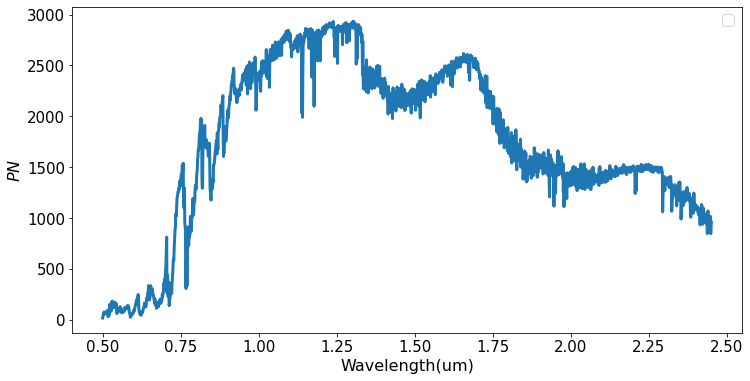

In [70]:
plt.figure(figsize=(12, 6))
#plt.plot(wl_um_check, tbd_tra1_erg_check/(1/ang2_1.to(u.steradian)),'-',color = '#1f77b4', label='Blackbody flux we simulated',linewidth=3)
#plt.plot(sim_x, sim_y,'o',color = '#ff7f0e', label ='Data come from SIMBAD')
plt.plot(wl_um,pn_9e_elt_nogas,linewidth=3,color = '#1f77b4' )
#plt.plot(wl_um_rem,pn_planet_elt_rem[9][0],linewidth=3,color = 'red' )
#plt.errorbar(wl_um[:765], pn_15e_elt_nogas[:765],
#             yerr = dnr[15][:765],
#             fmt ='o')
plt.legend()
plt.xlabel("Wavelength(um)",fontdict={ 'size'   : 16})
plt.ylabel("$PN$",fontdict={ 'size'   : 16})
#plt.xlim(0.9,5.6)
#plt.ylim(0,0.5e3)
#plt.title("ELT-R150-TRA1")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(prop={'size': 15})

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


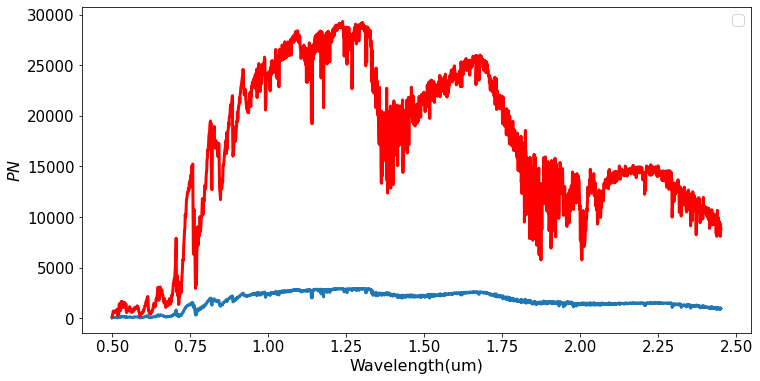

In [71]:
plt.figure(figsize=(12, 6))
#plt.plot(wl_um_check, tbd_tra1_erg_check/(1/ang2_1.to(u.steradian)),'-',color = '#1f77b4', label='Blackbody flux we simulated',linewidth=3)
#plt.plot(sim_x, sim_y,'o',color = '#ff7f0e', label ='Data come from SIMBAD')
plt.plot(wl_um,pn_9e_elt_nogas,linewidth=3,color = '#1f77b4' )
plt.plot(wl_um,pn_9e_elt,linewidth=3,color = 'red' )
plt.legend()
plt.xlabel("Wavelength(um)",fontdict={ 'size'   : 16})
plt.ylabel("$PN$",fontdict={ 'size'   : 16})
#plt.xlim(0.9,5.6)
#plt.title("ELT-R150-TRA1")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(prop={'size': 15})

In [72]:
flux_bin_the = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]#W/m**2
for a in range(len(Flux_tbd_planet_earth)):
    for i in range(len(bin_range)):
        flux_bin_the[a].append(np.sum(Flux_tbd_planet_earth[a][bin_range[i]].value))
        
        

In [73]:
flux_bin_ref = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]#W/m**2
for a in range(len(f_ref_planet_earth_fit)):
    for i in range(len(bin_range)):
        flux_bin_ref[a].append(np.sum(f_ref_planet_earth_fit[a][bin_range[i]]))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


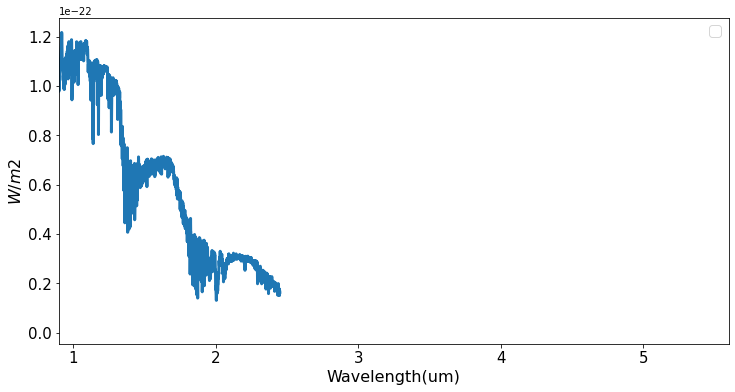

In [74]:
plt.figure(figsize=(12, 6))
#plt.plot(wl_um_check, tbd_tra1_erg_check/(1/ang2_1.to(u.steradian)),'-',color = '#1f77b4', label='Blackbody flux we simulated',linewidth=3)
#plt.plot(sim_x, sim_y,'o',color = '#ff7f0e', label ='Data come from SIMBAD')
plt.plot(wl_um,flux_bin_ref[9],linewidth=3,color = '#1f77b4' )
plt.legend()
plt.xlabel("Wavelength(um)",fontdict={ 'size'   : 16})
plt.ylabel("$W/m2$",fontdict={ 'size'   : 16})
plt.xlim(0.9,5.6)
#plt.title("ELT-R150-TRA1")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(prop={'size': 15})

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


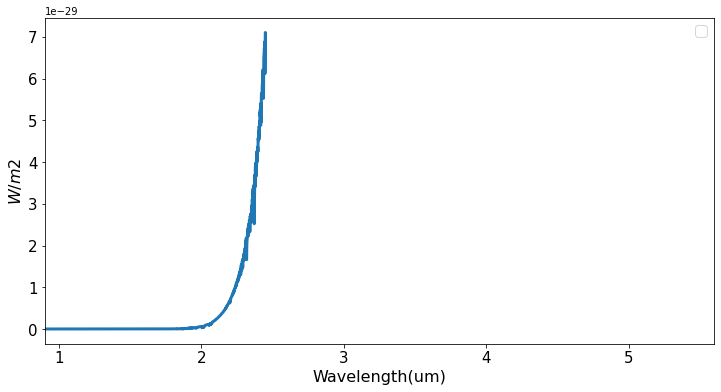

In [75]:
plt.figure(figsize=(12, 6))
#plt.plot(wl_um_check, tbd_tra1_erg_check/(1/ang2_1.to(u.steradian)),'-',color = '#1f77b4', label='Blackbody flux we simulated',linewidth=3)
#plt.plot(sim_x, sim_y,'o',color = '#ff7f0e', label ='Data come from SIMBAD')
plt.plot(wl_um,flux_bin_the[9],linewidth=3,color = '#1f77b4' )
plt.legend()
plt.xlabel("Wavelength(um)",fontdict={ 'size'   : 16})
plt.ylabel("$W/m2$",fontdict={ 'size'   : 16})
plt.xlim(0.9,5.6)
#plt.title("ELT-R150-TRA1")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(prop={'size': 15})

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


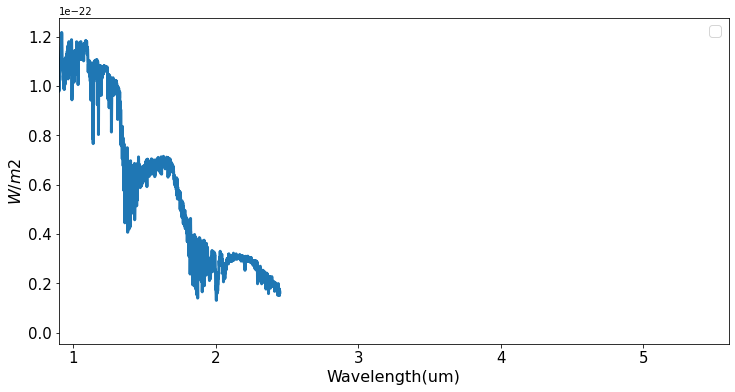

In [76]:
plt.figure(figsize=(12, 6))
#plt.plot(wl_um_check, tbd_tra1_erg_check/(1/ang2_1.to(u.steradian)),'-',color = '#1f77b4', label='Blackbody flux we simulated',linewidth=3)
#plt.plot(sim_x, sim_y,'o',color = '#ff7f0e', label ='Data come from SIMBAD')
plt.plot(wl_um,(np.array(flux_bin_the[9])+np.array(flux_bin_ref[9])),linewidth=3,color = '#1f77b4' )
plt.legend()
plt.xlabel("Wavelength(um)",fontdict={ 'size'   : 16})
plt.ylabel("$W/m2$",fontdict={ 'size'   : 16})
plt.xlim(0.9,5.6)
#plt.title("ELT-R150-TRA1")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(prop={'size': 15})

## STAR

In [77]:
pts

,Planet,MassEar,RadiusEar,SMAAU,DistancePC,SRadiusSun,Slogg,STK,limit_wl,SNR_o2,SNR_ch4,SNR_h2o,SNR_co2,SNR_total,mag
0,GJ 1002 c,1.360,1.089911,0.07380,4.84867,0.1400,5.10,3024.0,2.900021,0.014838,0.038789,0.060831,0.031970,0.080295,35.163311
1,GJ 1061 d,1.640,1.148567,0.05400,3.67278,0.1600,5.16,2953.0,2.801343,0.046436,0.121392,0.190372,0.100050,0.251284,33.478073
2,GJ 667 C c,3.800,1.819741,0.12500,7.24396,0.3300,4.69,3350.0,3.287770,0.054995,0.138967,0.175051,0.119916,0.259537,32.049286
3,GJ 682 b,4.400,1.984149,0.08000,5.00671,0.3000,4.93,3028.0,3.044423,0.086844,0.227028,0.356032,0.187113,0.469950,32.452245
4,GJ 887 b,4.200,1.930431,0.06800,3.29000,0.4700,4.78,3688.0,3.938043,1.018637,2.737655,3.177123,2.404603,4.940507,27.082653
5,Proxima Cen b,1.070,1.019125,0.04856,1.30119,0.1400,5.16,2900.0,7.110586,0.086896,0.230584,0.385061,0.187370,0.494065,32.130354
6,Wolf 1061 c,3.410,1.707113,0.08900,4.30592,0.3100,4.90,3342.0,3.938143,0.133386,0.338115,0.433497,0.291155,0.636243,30.760834
7,TRAPPIST-1 e,0.692,0.920000,0.02925,12.10000,0.1192,5.24,2566.0,0.460583,0.000000,0.000000,0.000000,0.000000,0.000000,38.703582
8,TRAPPIST-1 h,0.326,0.755000,0.06189,12.10000,0.1192,5.24,2566.0,0.974546,0.000357,0.000000,0.000805,0.000000,0.000881,40.760259
9,GJ 1002 b,1.080,1.021946,0.04570,4.84867,0.1400,5.10,3024.0,1.795812,0.034019,0.025913,0.123363,0.018352,0.131848,34.262424


In [78]:
pts[["Planet","SNR_h2o","SNR_ch4","SNR_co2","SNR_o2","SNR_total"]]
#pts[['Planet','SNR_total']].sort_values(by='SNR_total',ascending=False).to_latex()

,Planet,SNR_h2o,SNR_ch4,SNR_co2,SNR_o2,SNR_total
0,GJ 1002 c,0.060831,0.038789,0.031970,0.014838,0.080295
1,GJ 1061 d,0.190372,0.121392,0.100050,0.046436,0.251284
2,GJ 667 C c,0.175051,0.138967,0.119916,0.054995,0.259537
3,GJ 682 b,0.356032,0.227028,0.187113,0.086844,0.469950
4,GJ 887 b,3.177123,2.737655,2.404603,1.018637,4.940507
5,Proxima Cen b,0.385061,0.230584,0.187370,0.086896,0.494065
6,Wolf 1061 c,0.433497,0.338115,0.291155,0.133386,0.636243
7,TRAPPIST-1 e,0.000000,0.000000,0.000000,0.000000,0.000000
8,TRAPPIST-1 h,0.000805,0.000000,0.000000,0.000357,0.000881
9,GJ 1002 b,0.123363,0.025913,0.018352,0.034019,0.131848


In [79]:
len(f_s[1])

1079299

In [80]:
df_s = (pts.SRadiusSun * const.R_sun / (pts.DistancePC * const.pc))**2
f_s = np.array(Flux_surface)*np.array(df_s).reshape(-1,1)
f_s_fit = f_s 
flux_bin_s = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]#W/m**2
for a in range(len(f_s_fit)):
    for i in range(len(bin_range)):
        flux_bin_s[a].append(np.sum(f_s_fit[a][bin_range[i]]))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


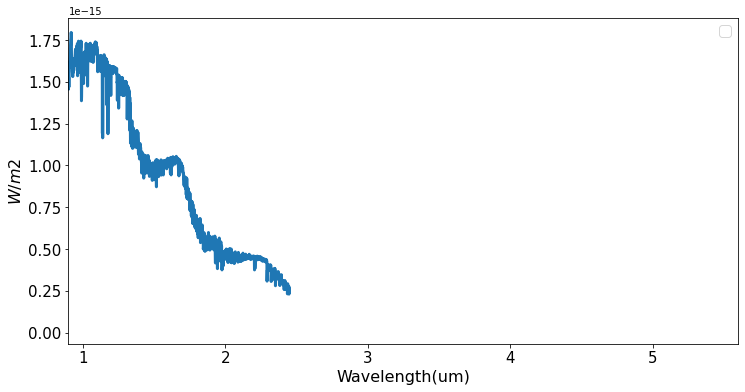

In [81]:
plt.figure(figsize=(12, 6))
#plt.plot(wl_um_check, tbd_tra1_erg_check/(1/ang2_1.to(u.steradian)),'-',color = '#1f77b4', label='Blackbody flux we simulated',linewidth=3)
#plt.plot(sim_x, sim_y,'o',color = '#ff7f0e', label ='Data come from SIMBAD')
plt.plot(wl_um,flux_bin_s[9],linewidth=3,color = '#1f77b4' )
plt.legend()
plt.xlabel("Wavelength(um)",fontdict={ 'size'   : 16})
plt.ylabel("$W/m2$",fontdict={ 'size'   : 16})
plt.xlim(0.9,5.6)
#plt.title("ELT-R150-TRA1")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(prop={'size': 15})

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


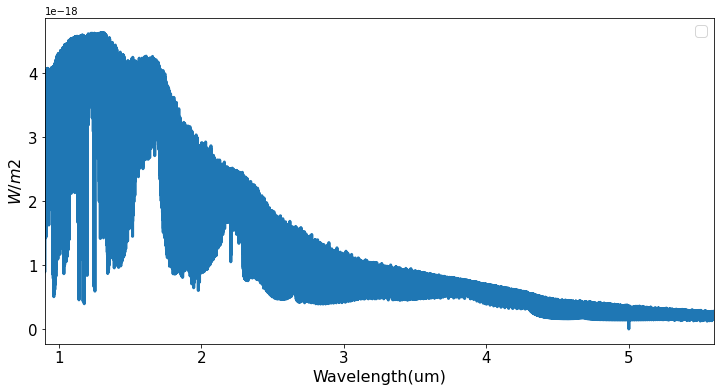

In [82]:
#AT EARTH
plt.figure(figsize=(12, 6))
#plt.plot(wl_um_check, tbd_tra1_erg_check/(1/ang2_1.to(u.steradian)),'-',color = '#1f77b4', label='Blackbody flux we simulated',linewidth=3)
#plt.plot(sim_x, sim_y,'o',color = '#ff7f0e', label ='Data come from SIMBAD')
plt.plot(absor1.nm[1:1079300]/1000,f_s[9],linewidth=3,color = '#1f77b4' )
plt.legend()
plt.xlabel("Wavelength(um)",fontdict={ 'size'   : 16})
plt.ylabel("$W/m2$",fontdict={ 'size'   : 16})
plt.xlim(0.9,5.6)
#plt.title("ELT-R150-TRA1")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(prop={'size': 15})

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


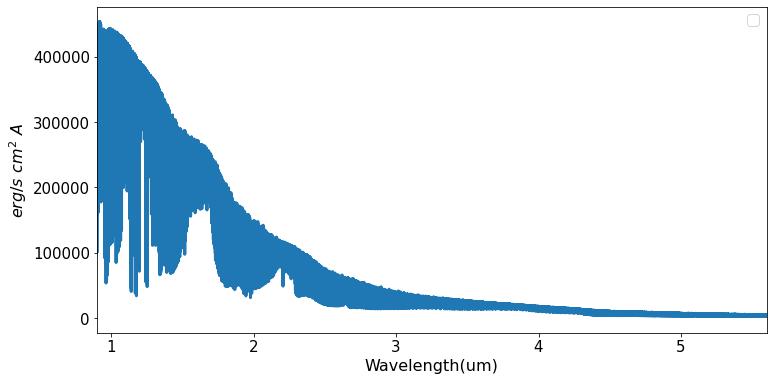

In [83]:
#SURFACE
plt.figure(figsize=(12, 6))
#plt.plot(wl_um_check, tbd_tra1_erg_check/(1/ang2_1.to(u.steradian)),'-',color = '#1f77b4', label='Blackbody flux we simulated',linewidth=3)
#plt.plot(sim_x, sim_y,'o',color = '#ff7f0e', label ='Data come from SIMBAD')
plt.plot(f_traAng[9],f_tra1_fum0[9],linewidth=3,color = '#1f77b4' )
plt.legend()
plt.xlabel("Wavelength(um)",fontdict={ 'size'   : 16})
plt.ylabel("$erg/ s\ cm^2\ A$",fontdict={ 'size'   : 16})
plt.xlim(0.9,5.6)
#plt.title("ELT-R150-TRA1")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(prop={'size': 15})

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


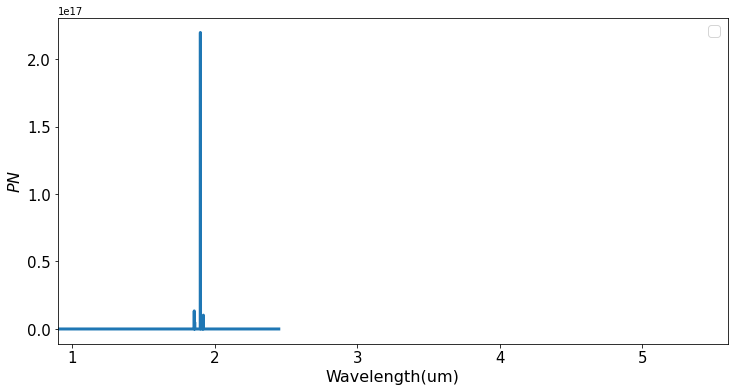

In [84]:

plt.figure(figsize=(12, 6))
#plt.plot(wl_um_check, tbd_tra1_erg_check/(1/ang2_1.to(u.steradian)),'-',color = '#1f77b4', label='Blackbody flux we simulated',linewidth=3)
#plt.plot(sim_x, sim_y,'o',color = '#ff7f0e', label ='Data come from SIMBAD')
plt.plot(wl_um,n_9,linewidth=3,color = '#1f77b4' )
plt.legend()
plt.xlabel("Wavelength(um)",fontdict={ 'size'   : 16})
plt.ylabel("$PN$",fontdict={ 'size'   : 16})
plt.xlim(0.9,5.6)
#plt.ylim(0,0.00006)
#plt.title("ELT-R150-TRA1")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(prop={'size': 15})

# check contrast form 10-3 to 10-6

In [85]:
n_9_3=((((pn_4e_elt+2* 10**(-2) *pn_4_elt)*trans_use+2*pnsky_1_elt)**(1/2) / nor_trans)**2 + (0.001)**2 * pn_4e_elt**2)**(1/2)
n_9_4=((((pn_4e_elt+2* 10**(-3) *pn_4_elt)*trans_use+2*pnsky_1_elt)**(1/2) / nor_trans)**2 + (0.001)**2 * pn_4e_elt**2)**(1/2)
n_9_5=((((pn_4e_elt+2* 10**(-4) *pn_4_elt)*trans_use+2*pnsky_1_elt)**(1/2) / nor_trans)**2 + (0.001)**2 * pn_4e_elt**2)**(1/2)
n_9_6=((((pn_4e_elt+2* 10**(-5) *pn_4_elt)*trans_use+2*pnsky_1_elt)**(1/2) / nor_trans)**2 + (0.001)**2 * pn_4e_elt**2)**(1/2)

In [86]:
print("SNR(h2o) with instrument contrast 10-2:",np.sum((dn[4][ind_ues_h2o[4]]/n_9_3[ind_ues_h2o[4]])**2)**(1/2))
print("SNR(h2o) with instrument contrast 10-3:",np.sum((dn[4][ind_ues_h2o[4]]/n_9_4[ind_ues_h2o[4]])**2)**(1/2))
print("SNR(h2o) with instrument contrast 10-4:",np.sum((dn[4][ind_ues_h2o[4]]/n_9_5[ind_ues_h2o[4]])**2)**(1/2))
print("SNR(h2o) with instrument contrast 10-5:",np.sum((dn[4][ind_ues_h2o[4]]/n_9_6[ind_ues_h2o[4]])**2)**(1/2))

SNR(h2o) with instrument contrast 10-2: 1.0047171362944312
SNR(h2o) with instrument contrast 10-3: 3.177122919995503
SNR(h2o) with instrument contrast 10-4: 10.044680397759986
SNR(h2o) with instrument contrast 10-5: 31.69273102101024


In [87]:
print("SNR(ch4) with instrument contrast 10-2:",np.sum((dn[4][ind_ues_ch4[4]]/n_9_3[ind_ues_ch4[4]])**2)**(1/2))
print("SNR(ch4) with instrument contrast 10-3:",np.sum((dn[4][ind_ues_ch4[4]]/n_9_4[ind_ues_ch4[4]])**2)**(1/2))
print("SNR(ch4) with instrument contrast 10-4:",np.sum((dn[4][ind_ues_ch4[4]]/n_9_5[ind_ues_ch4[4]])**2)**(1/2))
print("SNR(ch4) with instrument contrast 10-5:",np.sum((dn[4][ind_ues_ch4[4]]/n_9_6[ind_ues_ch4[4]])**2)**(1/2))

SNR(ch4) with instrument contrast 10-2: 0.8657425941854417
SNR(ch4) with instrument contrast 10-3: 2.7376552568505828
SNR(ch4) with instrument contrast 10-4: 8.655228004664044
SNR(ch4) with instrument contrast 10-5: 27.307290486340925


In [88]:
print("SNR(co2) with instrument contrast 10-2:",np.sum((dn[4][ind_ues_co2[4]]/n_9_3[ind_ues_co2[4]])**2)**(1/2))
print("SNR(co2) with instrument contrast 10-3:",np.sum((dn[4][ind_ues_co2[4]]/n_9_4[ind_ues_co2[4]])**2)**(1/2))
print("SNR(co2) with instrument contrast 10-4:",np.sum((dn[4][ind_ues_co2[4]]/n_9_5[ind_ues_co2[4]])**2)**(1/2))
print("SNR(co2) with instrument contrast 10-5:",np.sum((dn[4][ind_ues_co2[4]]/n_9_6[ind_ues_co2[4]])**2)**(1/2))

SNR(co2) with instrument contrast 10-2: 0.7604196293312732
SNR(co2) with instrument contrast 10-3: 2.4046034702536385
SNR(co2) with instrument contrast 10-4: 7.6022999034978085
SNR(co2) with instrument contrast 10-5: 23.986270939626873


In [89]:
print("SNR(o2) with instrument contrast 10-2:",np.sum((dn[4][ind_ues_o2[4]]/n_9_3[ind_ues_o2[4]])**2)**(1/2))
print("SNR(o2) with instrument contrast 10-3:",np.sum((dn[4][ind_ues_o2[4]]/n_9_4[ind_ues_o2[4]])**2)**(1/2))
print("SNR(o2) with instrument contrast 10-4:",np.sum((dn[4][ind_ues_o2[4]]/n_9_5[ind_ues_o2[4]])**2)**(1/2))
print("SNR(o2) with instrument contrast 10-5:",np.sum((dn[4][ind_ues_o2[4]]/n_9_6[ind_ues_o2[4]])**2)**(1/2))

SNR(o2) with instrument contrast 10-2: 0.32212899903810116
SNR(o2) with instrument contrast 10-3: 1.0186372854267658
SNR(o2) with instrument contrast 10-4: 3.2204536391953806
SNR(o2) with instrument contrast 10-5: 10.160019331864717


In [90]:
print("SNR(total) with instrument contrast 10-2:",np.sum((dn[4][ind_ues_totno[4]]/n_9_3[ind_ues_totno[4]])**2)**(1/2))
print("SNR(total) with instrument contrast 10-3:",np.sum((dn[4][ind_ues_totno[4]]/n_9_4[ind_ues_totno[4]])**2)**(1/2))
print("SNR(total) with instrument contrast 10-4:",np.sum((dn[4][ind_ues_totno[4]]/n_9_5[ind_ues_totno[4]])**2)**(1/2))
print("SNR(total) with instrument contrast 10-5:",np.sum((dn[4][ind_ues_totno[4]]/n_9_6[ind_ues_totno[4]])**2)**(1/2))

SNR(total) with instrument contrast 10-2: 1.5623609915906824
SNR(total) with instrument contrast 10-3: 4.9405066665818635
SNR(total) with instrument contrast 10-4: 15.61969466957642
SNR(total) with instrument contrast 10-5: 49.281685235882144


/var/folders/6t/cpjtlkn10wv603vnph9nr3sh0000gn/T/ipykernel_889/3574435090.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  print("SNR(total) with instrument contrast 10-2:",np.sum((dn[4][ind_ues_totno[4]]/n_9_3[ind_ues_totno[4]])**2)**(1/2))
/usr/local/anaconda3/envs/5300-env/lib/python3.9/site-packages/astropy/units/quantity.py:1294: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = super().__getitem__(key)
/var/folders/6t/cpjtlkn10wv603vnph9nr3sh0000gn/T/ipykernel_889/3574435090.py:2: FutureWarning: Using a non-tuple sequence for m

# TRAPPIST-1

In [ ]:
pts

In [ ]:
pts.DistancePC[14]*u.pc

In [ ]:
pts.RadiusEar[14]*u.R_earth

In [ ]:
pts.SMAAU[14]*u.au

In [ ]:
((pts.RadiusEar[14]*u.R_earth / (pts.SMAAU[14]*u.au))**2).to(u.m/u.m)

## Sep

### arctan(a / D)

In [ ]:
np.arctan((pts.SMAAU[14]*u.au/(pts.DistancePC[14]*u.pc)).to(u.m/u.m)).to(u.arcsec)

## Contrast

In [ ]:
((((pts.RadiusEar[14]*u.R_earth / (pts.SMAAU[14]*u.au))**2).to(u.m/u.m)))*0.3

# H

In [ ]:
np.arctan((pts.SMAAU[15]*u.au/(pts.DistancePC[15]*u.pc)).to(u.m/u.m)).to(u.arcsec)

In [ ]:
((((pts.RadiusEar[15]*u.R_earth / (pts.SMAAU[15]*u.au))**2).to(u.m/u.m)))*0.3